In [7]:
def preprocess(dataset):
    dataset = dataset.split("\n")
    dataset_clean = []
    for item in dataset:
        try:
            dataset_clean.append(float(item.strip()))
        except ValueError:
            pass
    return dataset_clean
    
## Dataset EM
with open("data-EM.txt", "r") as data_file:
    d1 = data_file.read()
    
d1 = preprocess(d1)

### Questão 3

In [8]:
import numpy as np
import math

#### Passo inicial: escolhe de valores para os parâmetros:

In [47]:
def inicio(dataset):
    # Equal prior for classes
    pi = np.full((1,2), 0.5)[0]
    
    # Random initial values for mu
    mu  = np.random.rand(1,2)[0] * (max(dataset) - min(dataset)) + min(dataset)
    
    # Unit variance
    sigma = np.zeros((2,2))
    np.fill_diagonal(sigma, 1)
    return pi, mu, sigma

#### Passo E: Utiliza-se os valores atuais dos parâmetros ($\pi$, $\mu$, $\sigma$) para calcular o posterior de cada gaussiana

In [167]:
# p(x|z)
def pdf_normal(x, mu, sigma):
    pdf = (2*math.pi*sigma**2)**(-1/2) * math.exp(-1/(2*sigma**2) * (x-mu)**2)
    return pdf

# p(x|z)*p(z)
def likelihood_normal(x, pi, mu, sigma):
    return pi * pdf_normal(x, mu, sigma)

# E-step
def expectation(dataset, pi, mu, sigma):
    gamma = np.zeros((len(dataset), len(pi)))
    for n in range(len(dataset)):
        norm_sum = 0
        for k in range(len(pi)):
            gamma[n,k] = likelihood_normal(dataset[n], pi[k], mu[k], sigma[k,k])
            norm_sum += gamma[n,k]
        gamma[n,:] = gamma[n,:]/norm_sum
    return gamma

#### Passo M: reestima-se os parâmetros dados os posteriores (responsabilidades) calculadas no passo E

In [ ]:
# M-step
def maximization(gamma, dataset, pi, mu, sigma):
    n_k = np.sum(gamma, axis=0)
    mu = np.zeros(mu.shape)
    sigma = np.zeros(sigma.shape)
    pi = n_k/len(dataset)
    for k in range(gamma.shape[1]):
        for n in range(len(dataset)):
            mu[k] += gamma[n,k] * dataset[n]
        mu[k] = mu[k]/n_k[k]
        for n in range(len(dataset)):
            sigma[k,k] +=  gamma[n,k] * (dataset[n] - mu[k])**2
        
    return pi, mu, sigma/n_k

#### EM: iterar até a convergência ou que um número de rodadas tenha acontecido

In [169]:
# EM
def em(dataset):
    pi, mu, sigma = inicio(dataset)
    
    for i in range(3):
        gamma = expectation(dataset, pi, mu, sigma)
        pi, mu, sigma = maximization(gamma, dataset, pi, mu, sigma)
        print("Iteração %d:" % i)
        print("Prior: %s" % pi)
        print("Médias: %s" % mu)
        print("Sigmas: \n%s" % sigma)
        print("\n\n")
em(d1)

Iteração 0:
Prior: [ 0.57  0.43]
Médias: [ 19.90349794   4.94840003]
Sigmas: 
[[ 3.85155795  0.        ]
 [ 0.          1.21762187]]



Iteração 1:
Prior: [ 0.57040818  0.42959182]
Médias: [ 19.89397016   4.94684114]
Sigmas: 
[[ 3.97625018  0.        ]
 [ 0.          1.21531312]]



Iteração 2:
Prior: [ 0.57058023  0.42941977]
Médias: [ 19.88989925   4.94626153]
Sigmas: 
[[ 4.03036457  0.        ]
 [ 0.          1.21446858]]





<IPython.core.display.Javascript object>


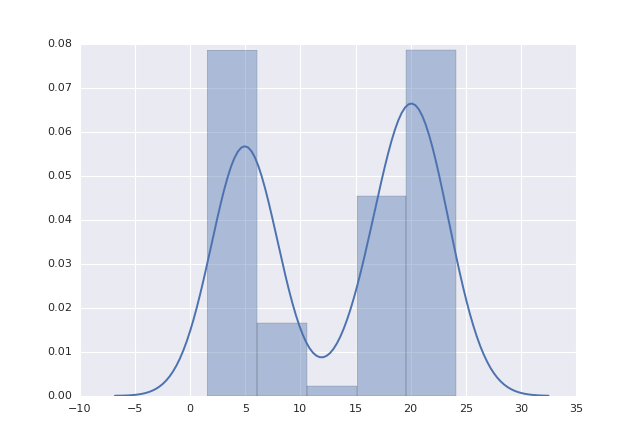

/home/lmoraes/miniconda3/envs/notebook3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [162]:
import seaborn as sns
%matplotlib notebook
sns.distplot(d1)

Pelo gráfico é possível visualizar a distribuição supondo que o dataset possa ser representado por 2 gaussianas. Note que o algoritmo EM já retorna como resposta valores muito próximos das médias de cada gaussiana.